<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/notebooks/04_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADMIN

In [1]:
# Mount GDrive to facilitate data import
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [10]:
# Change working directory to project folder
%cd /content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project

/content/drive/MyDrive/Colab Notebooks/Machine-Learning-Project


In [6]:
# !git clone https://github.com/OskarKrafft/Machine-Learning-Project.git

Cloning into 'Machine-Learning-Project'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 395 (delta 32), reused 24 (delta 7), pack-reused 328
Receiving objects: 100% (395/395), 26.00 MiB | 14.44 MiB/s, done.
Resolving deltas: 100% (205/205), done.
Checking out files: 100% (36/36), done.


# Import the Data

In [11]:
# Importing the data
import pandas as pd
eppes_cleaned = pd.read_csv('./data/processed/eppes_cleaned.csv')
eppes_cleaned = eppes_cleaned.drop(eppes_cleaned.columns[0], axis = 1)

# Import Excel sheet containing column indeces to be dropped
columns_analysis = pd.read_excel('./data/interim/Drop_Columns_categorical.xlsx')
columns_analysis = columns_analysis.drop(columns_analysis.columns[[0]], axis = 1)

# Create list of names of categorical columns 
col_names_categorical = []
for i in range(872):
  if columns_analysis.iloc[i, 3] == 'categorical':
    col_names_categorical.append(columns_analysis.iloc[i, 1])

# Change datatype of categorical variables to object
eppes_cleaned[col_names_categorical] = eppes_cleaned[col_names_categorical].astype('object')

# Define X and y
print(eppes_cleaned.head())
X = eppes_cleaned.drop(columns='qg1') # reference variable which contains voted y/n
y = eppes_cleaned['qg1'] # reference variable which contains voted y/n

# 80/20 train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=123)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

y_train_df = pd.DataFrame(data=y_train)
y_train_df.value_counts(normalize=True)

# Setting up pre-processing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Identify all categorical variables by data type
categorical_X_features = X_train.select_dtypes(include=['object', 'bool']).columns

# OneHotEncode all categorical variables
categorical_transformer = OneHotEncoder(handle_unknown="error")

preprocessor = ColumnTransformer(remainder = 'passthrough', # remainder = passthrough for numerical variables to be kept unchanged
    transformers=[
        ("cat", categorical_transformer, categorical_X_features)]
)
# Inspect the number of variables after pre-processing

# Fit the pipeline to the training data
preprocessor.fit(X_train)
X_train_ = preprocessor.transform(X_train)

X_train_df = pd.DataFrame(data=X_train_)
X_train_df.describe()

   q1.1  q1.2  q1.3  q1.4  q1.5  q1.6  q1.7  q1.8  q1.9  q1.10  ...  d43a  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
1   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   2.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   1.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   2.0   

   d43b  d46.8  d60  d62_1  d62_2  d63  d72_1  d72_2  d77  
0   1.0    1.0  1.0    3.0    6.0  1.0    3.0    3.0  2.0  
1   1.0    1.0  3.0    2.0    6.0  3.0    2.0    2.0  3.0  
2   2.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  1.0  
3   1.0    1.0  2.0    1.0    1.0  3.0    2.0    2.0  1.0  
4   1.0    1.0  1.0    1.0    5.0  2.0    2.0    2.0  3.0  

[5 rows x 311 columns]


,0,1,2,3,4,5,6,7,8,9,...,925,926,927,928,929,930,931,932,933,934
count,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,...,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000
mean,0.250603,0.571845,0.141232,0.032497,0.003823,0.225342,0.555414,0.215921,0.003323,0.148195,...,0.034682,0.043557,0.141778,0.034591,0.051613,1.544581,51.483638,2.184835,0.256611,0.757908
std,0.433370,0.494823,0.348268,0.177321,0.061715,0.417817,0.496931,0.411469,0.057547,0.355302,...,0.182977,0.204113,0.348830,0.182746,0.221250,0.498020,18.164264,1.097736,0.676453,0.428359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000,2.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,53.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,66.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,98.000000,20.000000,20.000000,1.000000


# F1 and MCC

In [18]:
# Compare best performing models
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import RepeatedStratifiedKFold

# Load all the model specifications
models = []
models.append(('Logistic Regression', load('./models/best-logistic-regression-model.joblib')))
models.append(('Naive Bayes', load('./models/best-nb-model.joblib')))
# models.append(('SVM', load('./models/best-svm-model.joblib')))
models.append(('Random Forest', load('./models/best-rf-model.joblib')))

# Create lists for scores and model names. Comparison metric F1
results = []
names = []
scoring = 'f1'

for name, model in models:
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
  cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Logistic Regression: 0.793893 (0.009808)
Naive Bayes: 0.636356 (0.012903)
Random Forest: 0.792069 (0.011002)


In [28]:
print(results)

[array([0.79253112, 0.79958027, 0.77306469, 0.80554076, 0.78375527,
       0.79895561, 0.78972208, 0.79370079, 0.79958027, 0.80062144,
       0.79707113, 0.7926893 , 0.78721174, 0.776072  , 0.78274592,
       0.8153527 , 0.80727273, 0.7876569 , 0.80487805, 0.78759201,
       0.79000532, 0.79631525, 0.79135933, 0.80503145, 0.79091869,
       0.77364506, 0.79705573, 0.79247256, 0.80313316, 0.8012487 ]), array([0.62829989, 0.62634546, 0.65511971, 0.62857143, 0.61064718,
       0.65199591, 0.63942799, 0.64241164, 0.63786008, 0.63631714,
       0.61327713, 0.63136456, 0.63338534, 0.62951168, 0.64820513,
       0.63963507, 0.66529563, 0.63016529, 0.63673469, 0.63864685,
       0.60792492, 0.63562753, 0.64859335, 0.65161621, 0.62988027,
       0.6513089 , 0.64801628, 0.63838593, 0.63449692, 0.62162162]), array([0.79225536, 0.79539508, 0.78201058, 0.80876068, 0.78503688,
       0.79854997, 0.79227557, 0.79155673, 0.7932667 , 0.78985507,
       0.79519331, 0.79177649, 0.78597593, 0.77200424, 0.

In [30]:
model = np.repeat(names, 30)

model_results = np.concatenate(results).ravel()

model_results

array([0.79253112, 0.79958027, 0.77306469, 0.80554076, 0.78375527,
       0.79895561, 0.78972208, 0.79370079, 0.79958027, 0.80062144,
       0.79707113, 0.7926893 , 0.78721174, 0.776072  , 0.78274592,
       0.8153527 , 0.80727273, 0.7876569 , 0.80487805, 0.78759201,
       0.79000532, 0.79631525, 0.79135933, 0.80503145, 0.79091869,
       0.77364506, 0.79705573, 0.79247256, 0.80313316, 0.8012487 ,
       0.62829989, 0.62634546, 0.65511971, 0.62857143, 0.61064718,
       0.65199591, 0.63942799, 0.64241164, 0.63786008, 0.63631714,
       0.61327713, 0.63136456, 0.63338534, 0.62951168, 0.64820513,
       0.63963507, 0.66529563, 0.63016529, 0.63673469, 0.63864685,
       0.60792492, 0.63562753, 0.64859335, 0.65161621, 0.62988027,
       0.6513089 , 0.64801628, 0.63838593, 0.63449692, 0.62162162,
       0.79225536, 0.79539508, 0.78201058, 0.80876068, 0.78503688,
       0.79854997, 0.79227557, 0.79155673, 0.7932667 , 0.78985507,
       0.79519331, 0.79177649, 0.78597593, 0.77200424, 0.77467

In [35]:
# set seed
import numpy as np

model_data = pd.DataFrame({'model': model, 'f1': model_results})

print(model_data)


                  model        f1
0   Logistic Regression  0.792531
1   Logistic Regression  0.799580
2   Logistic Regression  0.773065
3   Logistic Regression  0.805541
4   Logistic Regression  0.783755
..                  ...       ...
85        Random Forest  0.769639
86        Random Forest  0.795551
87        Random Forest  0.791014
88        Random Forest  0.806519
89        Random Forest  0.802289

[90 rows x 2 columns]


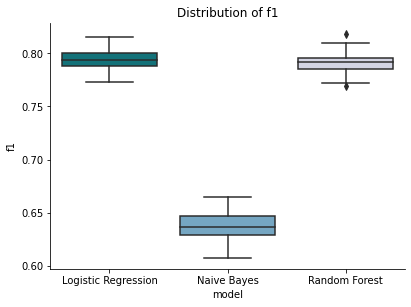

In [33]:
import seaborn as sns

f1 = sns.catplot(data=model_data, x="model", y="f1", kind="box", palette='PuBuGn_r')
f1.set(xticklabels=["Logistic Regression", "Naive Bayes", "Random Forest"])
f1.set(title='Distribution of f1')
f1.fig.set_size_inches(6,4)

In [36]:
f1.savefig('f1.png')

# Learning Curves

### Best Logistic Regression

In [ ]:
# # Define a pipeline with pre-processing and a Logistic Regression
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import joblib

# best_logistic_regression = joblib.load('./models/best-logistic-regression-model.joblib')
# print(best_logistic_regression)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


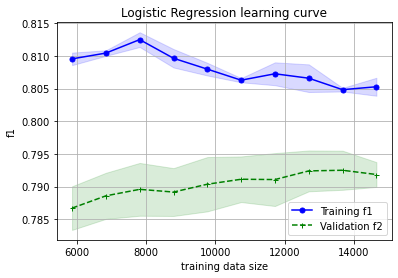

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from joblib import dump, load

best_logistic_regression = joblib.load('./models/best-logistic-regression-model.joblib')

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=best_logistic_regression, X=X_train, y=y_train,
                                                       cv=3, train_sizes=np.linspace(0.4, 1.0, 10),
                                                       scoring = "f1",
                                                       n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training f1')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation f2')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Logistic Regression learning curve')
plt.xlabel('training data size')
plt.ylabel('f1')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('lg-lc.png')
plt.show()

# the model 

### Naive Bayse

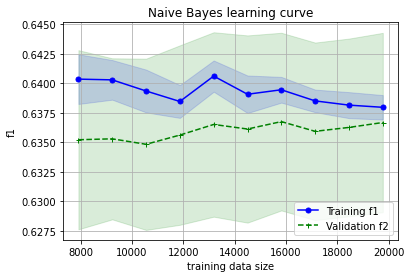

In [59]:
best_nb = joblib.load('./models/best-nb-model.joblib')

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=best_nb, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.4, 1.0, 10),
                                                       scoring = "f1",
                                                       n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training f1')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation f2')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Naive Bayes learning curve')
plt.xlabel('training data size')
plt.ylabel('f1')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('nb-lc.png')
plt.show()

# the model 

### Random Forest

In [44]:
best_rf = joblib.load('./models/best-rf-model.joblib')

# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=best_rf, X=X_train, y=y_train,
                                                       cv=2, train_sizes=np.linspace(0.4, 1.0, 10),
                                                       scoring = "f1",
                                                       n_jobs=-1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training f1')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation f2')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Naive Bayes learning curve')
plt.xlabel('training data size')
plt.ylabel('f1')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('rf-lc.png')
plt.show()

# the model 

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

### FAKE LEARNING CURVE

In [ ]:
import scikitplot as skplt

import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

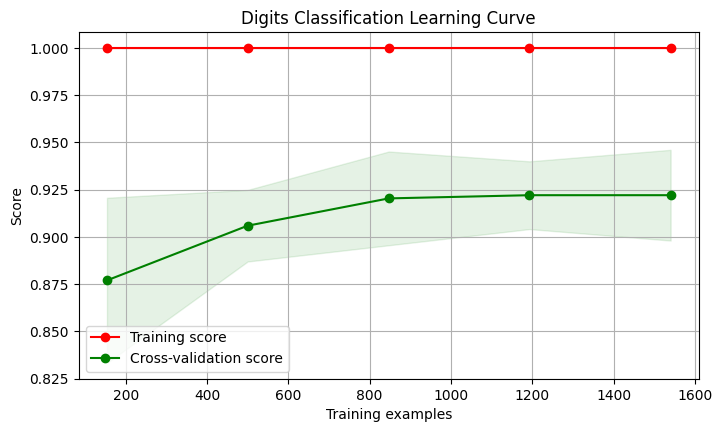

In [ ]:
digits = load_digits()
X_digits, Y_digits = digits.data, digits.target

X_digits_train, X_digits_test, Y_digits_train, Y_digits_test = train_test_split(X_digits, Y_digits,
                                                                                train_size=0.8,
                                                                                stratify=Y_digits,
                                                                                random_state=1)

skplt.estimators.plot_learning_curve(LogisticRegression(), X_digits, Y_digits,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(8,4.5), title_fontsize="large", text_fontsize="medium",
                                     title="Digits Classification Learning Curve");

# Visualise feature importance

In [ ]:
!pip install scikit-plot

In [51]:
import scikitplot as skplt
best_rf = joblib.load('./models/best-rf-model.joblib')


best_rf.fit(X_train, y_train)
best_rf.score(X_test, y_test)

rf_fi = skplt.estimators.plot_feature_importances(best_rf, feature_names=eppes_cleaned.feature_names, figsize=(24, 13.5),
                                        title_fontsize="large", text_fontsize="medium",
                                        title="Random Forest Feature Importance",
                                        x_tick_rotation=90, order="ascending");

KeyboardInterrupt: ignored

In [ ]:
rf_fi.savefig('rf-fi.png')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

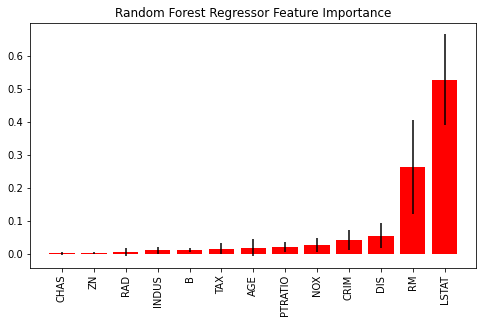

In [53]:
# import scikitplot as skplt

# import sklearn
# from sklearn.datasets import load_digits, load_boston, load_breast_cancer
# from sklearn.model_selection import train_test_split

# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# import matplotlib.pyplot as plt

# boston = load_boston()
# X_boston, Y_boston = boston.data, boston.target

# X_boston_train, X_boston_test, Y_boston_train, Y_boston_test = train_test_split(X_boston, Y_boston,
#                                                                                 train_size=0.8,
#                                                                                 random_state=1)

# rf_reg = RandomForestRegressor()
# rf_reg.fit(X_boston_train, Y_boston_train)
# rf_reg.score(X_boston_test, Y_boston_test)


# bla = skplt.estimators.plot_feature_importances(rf_reg, feature_names=boston.feature_names, figsize=(8, 4.5),
#                                         title_fontsize="large", text_fontsize="medium",
#                                         title="Random Forest Regressor Feature Importance",
#                                         x_tick_rotation=90, order="ascending");